In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%cd '/content/drive/My Drive/Colab Notebooks/Paddy Segmentation'

/content/drive/My Drive/Colab Notebooks/Paddy Segmentation


In [2]:
!pip install rasterio

     |████████████████████████████████| 15.1MB 2.5MB/s 


In [3]:
import os
import rasterio
import numpy as np
import csv
import pandas as pd
from keras.models import load_model

Using TensorFlow backend.


In [7]:
Img_pixels = []
with rasterio.open("Input/img.tif") as src:
  Img_pixels.append(src.read())

Img_pixels = np.array(Img_pixels)
print(Img_pixels)
Img_pixels = np.reshape(Img_pixels,(4,src.height,src.width))
print(Img_pixels.shape)
print(Img_pixels[0].shape)

pixel_bancolor = [Img_pixels[i].flatten() for i in range(4)]
pixel_bancolor = np.array(pixel_bancolor).T
print(pixel_bancolor)
print(len(pixel_bancolor))

[[[[1082 1076 1064 ... 1076 1080 1074]
   [1082 1076 1064 ... 1082 1096 1074]
   [1090 1097 1066 ... 1076 1075 1055]
   ...
   [1116 1132 1119 ... 1086 1182 1248]
   [1105 1097 1117 ... 1197 1199 1244]
   [1117 1117 1122 ... 1197 1199 1244]]

  [[1030 1021 1029 ...  950  941  943]
   [1030 1021 1029 ...  947  936  924]
   [1031 1031 1052 ...  954  946  932]
   ...
   [1123 1123 1100 ...  994 1150 1211]
   [1119 1115 1103 ... 1166 1167 1175]
   [1100 1112 1116 ... 1166 1167 1175]]

  [[ 671  672  674 ...  728  709  694]
   [ 671  672  674 ...  703  701  685]
   [ 668  658  655 ...  704  676  667]
   ...
   [ 719  713  695 ...  744 1027 1135]
   [ 711  689  684 ... 1030 1079 1129]
   [ 695  698  731 ... 1030 1079 1129]]

  [[2866 2840 2882 ...  900  841  804]
   [2866 2840 2882 ...  978  916  860]
   [3171 3114 3078 ... 1039  950  898]
   ...
   [3296 3419 3470 ... 2588 2443 2084]
   [3361 3465 3458 ... 2621 2280 1935]
   [3364 3376 3311 ... 2621 2280 1935]]]]
(4, 608, 552)
(608, 552)
[[

In [9]:
model = load_model('Model/model_weight_paddy.h5')

p = model.predict(pixel_bancolor)
print(p)
p = (p <= 0.9).astype(np.uint8)
print(p)
print(p.shape)
p = np.argmax(p, axis=-1)
print(p)














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[[0.96139807 0.03104988]
 [0.9474864  0.05000305]
 [0.9818488  0.01815787]
 ...
 [0.01404124 0.98790216]
 [0.01340127 0.9868413 ]
 [0.00418326 0.9956901 ]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]
(335616, 2)
[1 1 1 ... 0 0 0]


(1, 608, 552)


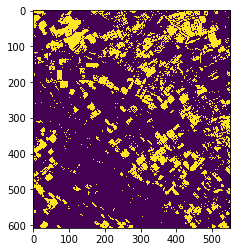

In [12]:
import matplotlib.pyplot as plt

predict = p.reshape(608,552,1).transpose(2,0,1)
print(predict.shape)
plt.imshow(predict[0])

In [0]:
profile = []
with rasterio.open('Input/img.tif') as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
with rasterio.open('Output/predict_mask.tif','w',**profile) as dst:
  dst.write(predict[0].astype(np.uint8), indexes=1)
        